In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sympy import *
import math 
from datetime import datetime
from scipy.special import gamma, factorial
import scipy.special as sc

In [2]:
#定义变量 
thermal_power_station_strategy=np.zeros(shape=(4,1000)) 
wind_power_station_strategy=np.zeros(shape=(2,1000))
c_wind_speed= np.loadtxt("./data/c_wind_speed_uniform_distribution_(3,25).txt")      
kappa_wind_speed= np.loadtxt("./data/kappa_wind_speed_uniform_distribution_(2,3).txt")  
d_power_demand=np.loadtxt("./data/d_power_demand_normal_distribution_(70,5).txt") #时变的需求侧用电需求  阶梯式变化 
thermal_power_station_dual_variable=np.zeros(shape=(4,1000))
wind_power_station_dual_variable=np.zeros(shape=(2,1000))#两个风力发电站中有一个是受到拜占庭攻击的 假设第二个风力发电站是受到攻击的
E=np.loadtxt("6_Network_Topology_Double_Random_Adjacency_Matrix.txt")
thermal_power_station_cost=np.zeros(shape=(1,1000)) #火力发电成本
wind_power_station_cost=np.zeros(shape=(1,1000)) #风力发电成本
sum_cost=np.zeros(shape=(1,1000)) #总发电成本
#thermal_power_station_eta=[0.0375,0.0375,0.0625,0.035]
thermal_power_station_eta=[0.0675,0.0675,0.0925,0.0625]
thermal_power_station_zeta=[2,1.75,1,3]
thermal_power_station_xi=[0,0,0,0]
thermal_power_station_P_min=[50,20,15,10]
thermal_power_station_P_max=[200,120,80,100]
#wind_power_station_varphi=[3,6]
wind_power_station_varphi=[1,6]
wind_power_station_v_in=[3,5]
wind_power_station_v_out=[25,25]
wind_power_station_v_r=[13,15]
wind_power_station_sigma_ue=[5,5]
wind_power_station_sigma_oe=[30,20]
wind_power_station_P_r=[160,160]
wind_power_station_P_min=[0,0]
wind_power_station_P_max=[160,160]
sum_thermal_wind_power_station_strategy=np.zeros(shape=(1,1000))
step_size_primal=1
step_size_dual=1
regularization_parameter=0.001
large_Gaussian_Byzantine_attack=np.loadtxt("./data/large_Gaussian_Byzantine_attack_(-10,5).txt")

In [3]:
#火力，风力发电策略初始化
thermal_power_station_strategy[0][0]=0
thermal_power_station_strategy[1][0]=0
thermal_power_station_strategy[2][0]=0
thermal_power_station_strategy[3][0]=0
wind_power_station_strategy[0][0]=0
wind_power_station_strategy[1][0]=0
#初始总发电策略
sum_thermal_wind_power_station_strategy[0][0]=0
#初始化受到攻击的风力发电站的对偶变量
wind_power_station_dual_variable[1][0]=large_Gaussian_Byzantine_attack[0]

#安全发电站的初始总发电成本
#火力发电成本
for i in range(0,4):
    thermal_power_station_cost[0][0]=thermal_power_station_cost[0][0]+thermal_power_station_eta[i]*thermal_power_station_strategy[i][0]*thermal_power_station_strategy[i][0]+thermal_power_station_zeta[i]*thermal_power_station_strategy[i][0]
#风力发电成本
for i in range(0,1):
    wind_power_station_cost[0][0]=wind_power_station_cost[0][0]+wind_power_station_varphi[i]*wind_power_station_strategy[i][0]+wind_power_station_sigma_ue[i]*((wind_power_station_P_r[i]-wind_power_station_strategy[i][0])*(math.exp(-(math.pow(wind_power_station_v_r[i],kappa_wind_speed[0]))/(math.pow(c_wind_speed[0],kappa_wind_speed[0])))-math.exp(-(math.pow(wind_power_station_v_out[i],kappa_wind_speed[0]))/(math.pow(c_wind_speed[0],kappa_wind_speed[0]))))+(wind_power_station_P_r[i]*wind_power_station_v_in[i]/(wind_power_station_v_r[i]-wind_power_station_v_in[i])+wind_power_station_strategy[i][0])*(math.exp(-(math.pow(wind_power_station_v_r[i],kappa_wind_speed[0]))/(math.pow(c_wind_speed[0],kappa_wind_speed[0])))-math.exp(-(math.pow(wind_power_station_v_in[i]+((wind_power_station_v_r[i]-wind_power_station_v_in[i])*wind_power_station_strategy[i][0])/wind_power_station_P_r[i],kappa_wind_speed[0]))/(math.pow(c_wind_speed[0],kappa_wind_speed[0]))))+(wind_power_station_P_r[i]*c_wind_speed[0]/(wind_power_station_v_r[i]-wind_power_station_v_in[i]))*(sc.gammaincc(1+1/kappa_wind_speed[0],(math.pow(wind_power_station_v_in[i]+((wind_power_station_v_r[i]-wind_power_station_v_in[i])*wind_power_station_strategy[i][0])/wind_power_station_P_r[i],kappa_wind_speed[0]))/(math.pow(c_wind_speed[0],kappa_wind_speed[0])))*sc.gamma(1+1/kappa_wind_speed[0])-sc.gammaincc(1+1/kappa_wind_speed[0],math.pow(wind_power_station_v_r[i]/c_wind_speed[0],kappa_wind_speed[0]))*sc.gamma(1+1/kappa_wind_speed[0])))+wind_power_station_sigma_oe[i]*((wind_power_station_strategy[i][0])*(1-math.exp(-(math.pow(wind_power_station_v_in[i],kappa_wind_speed[0]))/(math.pow(c_wind_speed[0],kappa_wind_speed[0])))+math.exp(-(math.pow(wind_power_station_v_out[i],kappa_wind_speed[0]))/(math.pow(c_wind_speed[0],kappa_wind_speed[0]))))+(wind_power_station_P_r[i]*wind_power_station_v_in[i]/(wind_power_station_v_r[i]-wind_power_station_v_in[i])+wind_power_station_strategy[i][0])*(math.exp(-(math.pow(wind_power_station_v_in[i],kappa_wind_speed[0]))/(math.pow(c_wind_speed[0],kappa_wind_speed[0])))-math.exp(-(math.pow(wind_power_station_v_in[i]+((wind_power_station_v_r[i]-wind_power_station_v_in[i])*wind_power_station_strategy[i][0])/wind_power_station_P_r[i],kappa_wind_speed[0]))/(math.pow(c_wind_speed[0],kappa_wind_speed[0]))))+(wind_power_station_P_r[i]*c_wind_speed[0]/(wind_power_station_v_r[i]-wind_power_station_v_in[i]))*(sc.gammaincc(1+1/kappa_wind_speed[0],(math.pow(wind_power_station_v_in[i]+((wind_power_station_v_r[i]-wind_power_station_v_in[i])*wind_power_station_strategy[i][0])/wind_power_station_P_r[i],kappa_wind_speed[0]))/(math.pow(c_wind_speed[0],kappa_wind_speed[0])))*sc.gamma(1+1/kappa_wind_speed[0])-sc.gammaincc(1+1/kappa_wind_speed[0],math.pow(wind_power_station_v_in[i]/c_wind_speed[0],kappa_wind_speed[0]))*sc.gamma(1+1/kappa_wind_speed[0])))
#发电总成本
sum_cost[0][0]=thermal_power_station_cost[0][0]+wind_power_station_cost[0][0]


In [4]:
def Byzantine_attack_decentralized_economic_dispatch(thermal_power_station_strategy,wind_power_station_strategy,c_wind_speed,kappa_wind_speed,d_power_demand,thermal_power_station_dual_variable,wind_power_station_dual_variable,E,thermal_power_station_cost,wind_power_station_cost,thermal_power_station_eta,thermal_power_station_zeta,thermal_power_station_P_min,thermal_power_station_P_max,wind_power_station_varphi,wind_power_station_sigma_ue,wind_power_station_sigma_oe,wind_power_station_P_min,wind_power_station_P_max,sum_thermal_wind_power_station_strategy,step_size_primal,step_size_dual):
    #显示初始化的数据
    #输出初始状态的原变量和对偶变量
    print("***************************attack_free_online_decentralized_economic_dispatch*****************************")
    print("相关变量初始值为：")
    for i in range (0,4):
        print("第",(i+1),"个火力发电站的初始计划发电量为:",thermal_power_station_strategy[i][0])
    for i in range (0,2):
        print("第",(i+5),"个风力发电站的初始计划发电量为:",wind_power_station_strategy[i][0])
    print("****************************************************************************")
    for i in range (0,4):
        print("第",(i+1),"个火力发电站的初始对偶变量为:",thermal_power_station_dual_variable[i][0])
    for i in range (0,1):
        print("第",(i+5),"个风力发电站的初始对偶变量为:",wind_power_station_dual_variable[i][0])
    print("****************************************************************************")
    print("第",(6),"个受到Byzantin攻击的风力发电站的初始对偶变量为:",wind_power_station_dual_variable[1][0])
    print("****************************************************************************")
    print("安全发电站的初始总发电量:",sum_thermal_wind_power_station_strategy[0][0])
    print("*************************")
    print("需求侧平均用电需求:",d_power_demand[0])
    print("****************************************************************************")
    print("风速分布参数c:",c_wind_speed[0])
    print("****************************************************************************")
    print("风速分布参数kappa:",kappa_wind_speed[0])
    print("****************************************************************************")
    print("安全发电站的总发电成本：", sum_cost[0][0])
    print("****************************************************************************")
    print("原变量迭代步长为:",step_size_primal)
    print("*****************************************************************************")
    print("对偶变量迭代步长为:",step_size_dual)
    print("*****************************************************************************")
    
    #开始迭代
    for k in range(1,1000):
        #发电站更新计划发电量和对偶变量
        #对偶变量 先做梯度上升 再做聚合
        #安全发电站的梯度上升
        dual_variable_intermediate=[] #存放当前迭代中6个用户对对偶变量做完梯度下降后得到的中间值
        for i in range(0,4):
            dual_variable_intermediate.append(thermal_power_station_dual_variable[i][k-1]+step_size_dual*((1/6)*thermal_power_station_strategy[i][k-1]-(1/6)*d_power_demand[k-1]-regularization_parameter*thermal_power_station_dual_variable[i][k-1]))
        for j in range(0,1):
            dual_variable_intermediate.append(wind_power_station_dual_variable[j][k-1]+step_size_dual*((1/6)*wind_power_station_strategy[j][k-1]-(1/6)*d_power_demand[k-1]-regularization_parameter*wind_power_station_dual_variable[j][k-1]))
        #受到攻击的风力发电站的对偶值
        dual_variable_intermediate.append(wind_power_station_dual_variable[1][k-1])
        #聚合 安全的火力发电站的对偶更新
        for i in range(0,4):
            weight_aggregation_dual_variable=0
            for j in range(0,4):
                weight_aggregation_dual_variable=weight_aggregation_dual_variable+E[i][j]*dual_variable_intermediate[j]               
            for j in range(0,2):
                weight_aggregation_dual_variable=weight_aggregation_dual_variable+E[i][j+4]*dual_variable_intermediate[j+4]
            thermal_power_station_dual_variable[i][k]=weight_aggregation_dual_variable
        #聚合 安全的风力发电站的对偶更新
        for i in range(0,1):
            weight_aggregation_dual_variable=0
            for j in range(0,4):
                weight_aggregation_dual_variable=weight_aggregation_dual_variable+E[i+4][j]*dual_variable_intermediate[j]               
            for j in range(0,2):
                weight_aggregation_dual_variable=weight_aggregation_dual_variable+E[i+4][j+4]*dual_variable_intermediate[j+4]
            wind_power_station_dual_variable[i][k]=weight_aggregation_dual_variable
        #受到Byzantine攻击的风力发电站的对偶更新
        wind_power_station_dual_variable[1][k]=large_Gaussian_Byzantine_attack[k]           
        
        #安全的火力发电站计划发电量
        for i in range(0,4):
            thermal_power_station_strategy[i][k]=thermal_power_station_strategy[i][k-1]-step_size_primal*(2*thermal_power_station_eta[i]*thermal_power_station_strategy[i][k-1]+thermal_power_station_zeta[i]+(1/6)*thermal_power_station_dual_variable[i][k-1]) 
            if thermal_power_station_strategy[i][k]<=thermal_power_station_P_min[i]:
                thermal_power_station_strategy[i][k]=thermal_power_station_P_min[i]
            elif thermal_power_station_strategy[i][k]>=thermal_power_station_P_max[i]:
                thermal_power_station_strategy[i][k]=thermal_power_station_P_max[i]
        #安全的风力发电站计划发电量
        for i in range(0,1):
            wind_power_station_strategy[i][k]=wind_power_station_strategy[i][k-1]-step_size_primal*(wind_power_station_varphi[i]+wind_power_station_sigma_oe[i]+(wind_power_station_sigma_ue[i]+wind_power_station_sigma_oe[i])*math.exp(-(math.pow(wind_power_station_v_out[i],kappa_wind_speed[k-1]))/(math.pow(c_wind_speed[k-1],kappa_wind_speed[k-1])))+(-wind_power_station_sigma_ue[i]-wind_power_station_sigma_oe[i])*math.exp(-(math.pow((wind_power_station_v_in[i]+((wind_power_station_v_r[i]-wind_power_station_v_in[i])*wind_power_station_strategy[i][k-1])/wind_power_station_P_r[i]),kappa_wind_speed[k-1]))/(math.pow(c_wind_speed[k-1],kappa_wind_speed[k-1])))+(1/6)*wind_power_station_dual_variable[i][k-1])
            if wind_power_station_strategy[i][k]<=wind_power_station_P_min[i]:
                wind_power_station_strategy[i][k]=wind_power_station_P_min[i]
            elif wind_power_station_strategy[i][k]>=wind_power_station_P_max[i]:
                wind_power_station_strategy[i][k]=wind_power_station_P_max[i]
        #受到Byzantine攻击的风力发电站的计划发电量
        wind_power_station_strategy[1][k]=wind_power_station_strategy[1][k-1]
        
        #安全发电站的计算总计划发电
        #火力发电量
        for i in range(0,4):
            sum_thermal_wind_power_station_strategy[0][k]=sum_thermal_wind_power_station_strategy[0][k]+thermal_power_station_strategy[i][k]
        #风力发电量
        for i in range(0,1):
            sum_thermal_wind_power_station_strategy[0][k]=sum_thermal_wind_power_station_strategy[0][k]+wind_power_station_strategy[i][k]
        
        #安全发电站的计算总发电成本
        #火力发电成本
        for i in range(0,4):
            thermal_power_station_cost[0][k]=thermal_power_station_cost[0][k]+thermal_power_station_eta[i]*thermal_power_station_strategy[i][k]*thermal_power_station_strategy[i][k]+thermal_power_station_zeta[i]*thermal_power_station_strategy[i][k]
        #风力发电成本
        for i in range(0,1):
            wind_power_station_cost[0][k]=wind_power_station_cost[0][k]+wind_power_station_varphi[i]*wind_power_station_strategy[i][k]+wind_power_station_sigma_ue[i]*((wind_power_station_P_r[i]-wind_power_station_strategy[i][k])*(math.exp(-(math.pow(wind_power_station_v_r[i],kappa_wind_speed[k]))/(math.pow(c_wind_speed[k],kappa_wind_speed[k])))-math.exp(-(math.pow(wind_power_station_v_out[i],kappa_wind_speed[k]))/(math.pow(c_wind_speed[k],kappa_wind_speed[k]))))+(wind_power_station_P_r[i]*wind_power_station_v_in[i]/(wind_power_station_v_r[i]-wind_power_station_v_in[i])+wind_power_station_strategy[i][k])*(math.exp(-(math.pow(wind_power_station_v_r[i],kappa_wind_speed[k]))/(math.pow(c_wind_speed[k],kappa_wind_speed[k])))-math.exp(-(math.pow(wind_power_station_v_in[i]+((wind_power_station_v_r[i]-wind_power_station_v_in[i])*wind_power_station_strategy[i][k])/wind_power_station_P_r[i],kappa_wind_speed[k]))/(math.pow(c_wind_speed[k],kappa_wind_speed[k]))))+(wind_power_station_P_r[i]*c_wind_speed[k]/(wind_power_station_v_r[i]-wind_power_station_v_in[i]))*(sc.gammaincc(1+1/kappa_wind_speed[k],(math.pow(wind_power_station_v_in[i]+((wind_power_station_v_r[i]-wind_power_station_v_in[i])*wind_power_station_strategy[i][k])/wind_power_station_P_r[i],kappa_wind_speed[k]))/(math.pow(c_wind_speed[k],kappa_wind_speed[k])))*sc.gamma(1+1/kappa_wind_speed[k])-sc.gammaincc(1+1/kappa_wind_speed[k],math.pow(wind_power_station_v_r[i]/c_wind_speed[k],kappa_wind_speed[k]))*sc.gamma(1+1/kappa_wind_speed[k])))+wind_power_station_sigma_oe[i]*((wind_power_station_strategy[i][k])*(1-math.exp(-(math.pow(wind_power_station_v_in[i],kappa_wind_speed[k]))/(math.pow(c_wind_speed[k],kappa_wind_speed[k])))+math.exp(-(math.pow(wind_power_station_v_out[i],kappa_wind_speed[k]))/(math.pow(c_wind_speed[k],kappa_wind_speed[k]))))+(wind_power_station_P_r[i]*wind_power_station_v_in[i]/(wind_power_station_v_r[i]-wind_power_station_v_in[i])+wind_power_station_strategy[i][k])*(math.exp(-(math.pow(wind_power_station_v_in[i],kappa_wind_speed[k]))/(math.pow(c_wind_speed[k],kappa_wind_speed[k])))-math.exp(-(math.pow(wind_power_station_v_in[i]+((wind_power_station_v_r[i]-wind_power_station_v_in[i])*wind_power_station_strategy[i][k])/wind_power_station_P_r[i],kappa_wind_speed[k]))/(math.pow(c_wind_speed[k],kappa_wind_speed[k]))))+(wind_power_station_P_r[i]*c_wind_speed[k]/(wind_power_station_v_r[i]-wind_power_station_v_in[i]))*(sc.gammaincc(1+1/kappa_wind_speed[k],(math.pow(wind_power_station_v_in[i]+((wind_power_station_v_r[i]-wind_power_station_v_in[i])*wind_power_station_strategy[i][k])/wind_power_station_P_r[i],kappa_wind_speed[k]))/(math.pow(c_wind_speed[k],kappa_wind_speed[k])))*sc.gamma(1+1/kappa_wind_speed[k])-sc.gammaincc(1+1/kappa_wind_speed[k],math.pow(wind_power_station_v_in[i]/c_wind_speed[k],kappa_wind_speed[k]))*sc.gamma(1+1/kappa_wind_speed[k])))
        #发电总成本
        sum_cost[0][k]=thermal_power_station_cost[0][k]+wind_power_station_cost[0][k]
        
        #输出第k次迭代中的结果 每间隔10次迭代输出一次结果
        #if (k+1)%10==0:
        print(k,"次迭代中的结果：")
        for i in range (0,4):
            print("第",(i+1),"个火力发电站的计划发电量为:",thermal_power_station_strategy[i][k])
        for i in range (0,2):
            print("第",(i+5),"个风力发电站的计划发电量为:",wind_power_station_strategy[i][k])
        print("****************************************************************************")
        for i in range (0,4):
            print("第",(i+1),"个火力发电站的对偶变量为:",thermal_power_station_dual_variable[i][k])
        for i in range (0,1):
            print("第",(i+5),"个风力发电站的对偶变量为:",wind_power_station_dual_variable[i][k])
        print("****************************************************************************")
        print("第",(6),"个受到Byzantin攻击的风力发电站的对偶变量为:",wind_power_station_dual_variable[1][k])
        print("****************************************************************************")
        print("安全发电站的总发电量:",sum_thermal_wind_power_station_strategy[0][k])
        print("*************************")
        print("需求侧平均用电需求:",d_power_demand[k])
        print("****************************************************************************")
        print("风速分布参数c:",c_wind_speed[k])
        print("****************************************************************************")
        print("风速分布参数kappa:",kappa_wind_speed[k])
        print("****************************************************************************")        
        print("安全发电站的总发电成本：", sum_cost[0][k])
        print("****************************************************************************")
        print("原变量迭代步长为:",step_size_primal)
        print("****************************************************************************")
        print("对偶变量迭代步长为:",step_size_dual)
        print("****************************************************************************")
        
        #step_size_primal=(pow(k+1,0.1))
        #step_size_dual=1/(pow(k+1,0.7))#我们发现在在线算法中 不能使用太小的对偶步长 不然后续算法对在线变化会不敏感 
        
        '''#尝试使用两阶段的步长
        if k<=500:
            step_size_dual=1/(pow(k+1,0.7))
        else:
            step_size_dual=0.1'''

    print(datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3])
    return None  

In [5]:
Byzantine_attack_decentralized_economic_dispatch(thermal_power_station_strategy,wind_power_station_strategy,c_wind_speed,kappa_wind_speed,d_power_demand,thermal_power_station_dual_variable,wind_power_station_dual_variable,E,thermal_power_station_cost,wind_power_station_cost,thermal_power_station_eta,thermal_power_station_zeta,thermal_power_station_P_min,thermal_power_station_P_max,wind_power_station_varphi,wind_power_station_sigma_ue,wind_power_station_sigma_oe,wind_power_station_P_min,wind_power_station_P_max,sum_thermal_wind_power_station_strategy,step_size_primal,step_size_dual)

***************************attack_free_online_decentralized_economic_dispatch*****************************
相关变量初始值为：
第 1 个火力发电站的初始计划发电量为: 0.0
第 2 个火力发电站的初始计划发电量为: 0.0
第 3 个火力发电站的初始计划发电量为: 0.0
第 4 个火力发电站的初始计划发电量为: 0.0
第 5 个风力发电站的初始计划发电量为: 0.0
第 6 个风力发电站的初始计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的初始对偶变量为: 0.0
第 2 个火力发电站的初始对偶变量为: 0.0
第 3 个火力发电站的初始对偶变量为: 0.0
第 4 个火力发电站的初始对偶变量为: 0.0
第 5 个风力发电站的初始对偶变量为: 0.0
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -4.09660692
****************************************************************************
安全发电站的初始总发电量: 0.0
*************************
需求侧平均用电需求: 72.62781256
****************************************************************************
风速分布参数c: 8.301041
****************************************************************************
风速分布参数kappa: 2.66836324
**************************************************************************

第 4 个火力发电站的对偶变量为: -37.21726117569784
第 5 个风力发电站的对偶变量为: -59.33315841237251
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -10.43346352
****************************************************************************
安全发电站的总发电量: 209.44787668403433
*************************
需求侧平均用电需求: 79.54768147
****************************************************************************
风速分布参数c: 13.22114577
****************************************************************************
风速分布参数kappa: 2.23501543
****************************************************************************
安全发电站的总发电成本： 1359.720982390042
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
28 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 57.79710328949578
第 2 个火力发电站的计划发电量为: 44.340875991229

需求侧平均用电需求: 80.07371787
****************************************************************************
风速分布参数c: 11.99698907
****************************************************************************
风速分布参数kappa: 2.40102409
****************************************************************************
安全发电站的总发电成本： 1148.9716417302927
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
56 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 51.18782817497601
第 2 个火力发电站的计划发电量为: 39.02485335641138
第 3 个火力发电站的计划发电量为: 32.834004892859234
第 4 个火力发电站的计划发电量为: 21.852318997159454
第 5 个风力发电站的计划发电量为: 49.65447166883638
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -59.1259151276143
第 2 个火力发电站的对偶变量为: -47.91185441025583
第 3 个火力发电站的对偶变量为: -47.82633969840913
第 4 

对偶变量迭代步长为: 1
****************************************************************************
77 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 50.0
第 2 个火力发电站的计划发电量为: 35.78687786087923
第 3 个火力发电站的计划发电量为: 29.34561485980784
第 4 个火力发电站的计划发电量为: 20.46180007932009
第 5 个风力发电站的计划发电量为: 58.9754745028081
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -46.24982449167305
第 2 个火力发电站的对偶变量为: -38.23633549877639
第 3 个火力发电站的对偶变量为: -38.144869420361346
第 4 个火力发电站的对偶变量为: -32.92051646541144
第 5 个风力发电站的对偶变量为: -45.99359052330409
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -15.1937985
****************************************************************************
安全发电站的总发电量: 194.56976730281525
*************************
需求侧平均用电需求: 68.69446225
****************************************************************************
风速分布参数c: 13.14144639
****************************************************************

****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
100 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 52.58072827655922
第 2 个火力发电站的计划发电量为: 41.52007063976924
第 3 个火力发电站的计划发电量为: 34.43652203091327
第 4 个火力发电站的计划发电量为: 24.408714830262287
第 5 个风力发电站的计划发电量为: 73.04725996703466
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -53.84949863417793
第 2 个火力发电站的对偶变量为: -45.43193714046328
第 3 个火力发电站的对偶变量为: -45.33404067824027
第 4 个火力发电站的对偶变量为: -38.9054988804414
第 5 个风力发电站的对偶变量为: -53.68604208047407
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -7.71794043
****************************************************************************
安全发电站的总发电量: 225.99329574453867
*************************
需求侧平均

第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -4.31850432
****************************************************************************
安全发电站的总发电量: 205.02642522276335
*************************
需求侧平均用电需求: 66.20961339
****************************************************************************
风速分布参数c: 12.45151853
****************************************************************************
风速分布参数kappa: 2.64873514
****************************************************************************
安全发电站的总发电成本： 1269.2627980242125
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
126 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 55.18816038816529
第 2 个火力发电站的计划发电量为: 42.96666168971518
第 3 个火力发电站的计划发电量为: 35.76738277433354
第 4 个火力发电站的计划发电量为: 24.683112651989177
第 5 个风力发电站的计划发电量为: 55.642060704239256
第 6 个风力发电站的计划发电量为: 0.0
***********

第 3 个火力发电站的对偶变量为: -39.068723245513496
第 4 个火力发电站的对偶变量为: -32.77297715142886
第 5 个风力发电站的对偶变量为: -47.85675195418438
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -9.67064129
****************************************************************************
安全发电站的总发电量: 193.46921045346576
*************************
需求侧平均用电需求: 72.24897657
****************************************************************************
风速分布参数c: 9.00811975
****************************************************************************
风速分布参数kappa: 2.09998952
****************************************************************************
安全发电站的总发电成本： 1228.8549813168952
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
151 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 50.08975051866

第 5 个风力发电站的对偶变量为: -56.155023741861655
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -4.28126112
****************************************************************************
安全发电站的总发电量: 222.0278248182269
*************************
需求侧平均用电需求: 63.33422699
****************************************************************************
风速分布参数c: 16.05258913
****************************************************************************
风速分布参数kappa: 2.17021965
****************************************************************************
安全发电站的总发电成本： 1422.3812231976929
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
174 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 53.58341887438695
第 2 个火力发电站的计划发电量为: 42.270005319685964
第 3 个火力发电站的计划发电量为: 34.9558661761

****************************************************************************
198 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 50.06559583560413
第 2 个火力发电站的计划发电量为: 39.39069964937272
第 3 个火力发电站的计划发电量为: 32.67314037226459
第 4 个火力发电站的计划发电量为: 22.61780259561298
第 5 个风力发电站的计划发电量为: 50.17084428719196
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -50.544336904079906
第 2 个火力发电站的对偶变量为: -40.674917259332624
第 3 个火力发电站的对偶变量为: -40.58147546894961
第 4 个火力发电站的对偶变量为: -33.64895113627846
第 5 个风力发电站的对偶变量为: -50.29216886127951
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -11.98496773
****************************************************************************
安全发电站的总发电量: 194.91808274004637
*************************
需求侧平均用电需求: 65.22670841
****************************************************************************
风速分布参数c: 7.06679623
*************************************************************

第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -50.75597283599368
第 2 个火力发电站的对偶变量为: -41.65438056680024
第 3 个火力发电站的对偶变量为: -41.561628448454805
第 4 个火力发电站的对偶变量为: -35.392315398238985
第 5 个风力发电站的对偶变量为: -50.518163009004795
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -8.55203444
****************************************************************************
安全发电站的总发电量: 219.67757026276018
*************************
需求侧平均用电需求: 63.35952108
****************************************************************************
风速分布参数c: 11.85034662
****************************************************************************
风速分布参数kappa: 2.73822856
****************************************************************************
安全发电站的总发电成本： 1231.0617389026017
****************************************************************************
原变量迭代步长为: 1
************************************

第 3 个火力发电站的对偶变量为: -46.576302853864746
第 4 个火力发电站的对偶变量为: -38.01564333155831
第 5 个风力发电站的对偶变量为: -57.43095631569565
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -7.11792924
****************************************************************************
安全发电站的总发电量: 195.77423539112883
*************************
需求侧平均用电需求: 72.27468236
****************************************************************************
风速分布参数c: 9.58050216
****************************************************************************
风速分布参数kappa: 2.81151191
****************************************************************************
安全发电站的总发电成本： 1155.3746023007902
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
246 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 52.90473065086

第 2 个火力发电站的对偶变量为: -42.8697251540926
第 3 个火力发电站的对偶变量为: -42.773443816957204
第 4 个火力发电站的对偶变量为: -38.03456487056998
第 5 个风力发电站的对偶变量为: -49.7410959971354
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -5.74649217
****************************************************************************
安全发电站的总发电量: 232.52761527566406
*************************
需求侧平均用电需求: 70.94130127
****************************************************************************
风速分布参数c: 21.98277119
****************************************************************************
风速分布参数kappa: 2.46298398
****************************************************************************
安全发电站的总发电成本： 1744.115201727548
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
269 次迭代中的结果

第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -55.51324706480415
第 2 个火力发电站的对偶变量为: -45.04011888240528
第 3 个火力发电站的对偶变量为: -44.957003003205884
第 4 个火力发电站的对偶变量为: -37.21802108703773
第 5 个风力发电站的对偶变量为: -55.54777092771846
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -14.03418835
****************************************************************************
安全发电站的总发电量: 194.09773029054304
*************************
需求侧平均用电需求: 67.22689138
****************************************************************************
风速分布参数c: 7.40342976
****************************************************************************
风速分布参数kappa: 2.47248182
****************************************************************************
安全发电站的总发电成本： 1234.906308071152
****************************************************************************
原变量迭代步长为: 1
***************************************

第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -55.023572459677695
第 2 个火力发电站的对偶变量为: -44.41078674131122
第 3 个火力发电站的对偶变量为: -44.301392602870386
第 4 个火力发电站的对偶变量为: -36.021269794540046
第 5 个风力发电站的对偶变量为: -54.985995054420115
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -8.74812449
****************************************************************************
安全发电站的总发电量: 234.77916458620882
*************************
需求侧平均用电需求: 71.78922598
****************************************************************************
风速分布参数c: 5.62488453
****************************************************************************
风速分布参数kappa: 2.18067578
****************************************************************************
安全发电站的总发电成本： 2095.6092283148105
****************************************************************************
原变量迭代步长为: 1
************************************

****************************************************************************
风速分布参数c: 15.3387833
****************************************************************************
风速分布参数kappa: 2.06174959
****************************************************************************
安全发电站的总发电成本： 1368.2861447087091
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
336 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 50.0
第 2 个火力发电站的计划发电量为: 38.94910834064534
第 3 个火力发电站的计划发电量为: 31.989974124623917
第 4 个火力发电站的计划发电量为: 23.840930679205947
第 5 个风力发电站的计划发电量为: 73.58562431557935
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -48.74874820112621
第 2 个火力发电站的对偶变量为: -39.75035614327833
第 3 个火力发电站的对偶变量为: -39.652562097209774
第 4 个火力发电站的对偶变量为: -34.04341739068918
第

安全发电站的总发电成本： 1313.7312941334549
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
356 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 54.06014084723063
第 2 个火力发电站的计划发电量为: 42.141945161953295
第 3 个火力发电站的计划发电量为: 34.72651621052915
第 4 个火力发电站的计划发电量为: 23.915843334105457
第 5 个风力发电站的计划发电量为: 28.779976696656853
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -55.33472670770446
第 2 个火力发电站的对偶变量为: -44.83743164424386
第 3 个火力发电站的对偶变量为: -44.73456958934331
第 4 个火力发电站的对偶变量为: -35.68692607651073
第 5 个风力发电站的对偶变量为: -55.71408989666581
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -10.11335072
****************************************************************************
安全发电站的总发电量: 183.6244222504

****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
379 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 50.0
第 2 个火力发电站的计划发电量为: 39.45186631541643
第 3 个火力发电站的计划发电量为: 32.10427592076811
第 4 个火力发电站的计划发电量为: 23.6919045688849
第 5 个风力发电站的计划发电量为: 70.88579791553748
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -49.01791993819985
第 2 个火力发电站的对偶变量为: -41.17325784476584
第 3 个火力发电站的对偶变量为: -41.069865257946134
第 4 个火力发电站的对偶变量为: -35.37953015261343
第 5 个风力发电站的对偶变量为: -48.764544585950944
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -15.59456001
****************************************************************************
安全发电站的总发电量: 216.13384472060693
*************************
需求侧平均用电需求: 74.90

第 1 个火力发电站的计划发电量为: 50.0
第 2 个火力发电站的计划发电量为: 36.52161853038846
第 3 个火力发电站的计划发电量为: 30.231949888996738
第 4 个火力发电站的计划发电量为: 22.259366703458973
第 5 个风力发电站的计划发电量为: 69.80795333920734
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -48.077522180911245
第 2 个火力发电站的对偶变量为: -39.47309157708383
第 3 个火力发电站的对偶变量为: -39.384694041676944
第 4 个火力发电站的对偶变量为: -33.73643100444992
第 5 个风力发电站的对偶变量为: -47.85475936802316
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -6.30806524
****************************************************************************
安全发电站的总发电量: 208.82088846205153
*************************
需求侧平均用电需求: 73.94817261
****************************************************************************
风速分布参数c: 24.7872305
****************************************************************************
风速分布参数kappa: 2.70980153
**************************************************************

第 5 个风力发电站的计划发电量为: 72.40826042908138
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -54.21251821189619
第 2 个火力发电站的对偶变量为: -43.3759266915703
第 3 个火力发电站的对偶变量为: -43.27447146531138
第 4 个火力发电站的对偶变量为: -35.463052227496455
第 5 个风力发电站的对偶变量为: -54.088213948877026
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -3.10108639
****************************************************************************
安全发电站的总发电量: 231.22927202228027
*************************
需求侧平均用电需求: 69.5966073
****************************************************************************
风速分布参数c: 13.82339548
****************************************************************************
风速分布参数kappa: 2.1330453
****************************************************************************
安全发电站的总发电成本： 1434.574359550249
****************************************************************************
原变量迭代步长为: 1
****

第 1 个火力发电站的计划发电量为: 50.0
第 2 个火力发电站的计划发电量为: 38.066773238980055
第 3 个火力发电站的计划发电量为: 31.65506080046201
第 4 个火力发电站的计划发电量为: 22.7013240575387
第 5 个风力发电站的计划发电量为: 68.36725848977898
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -48.970531137343386
第 2 个火力发电站的对偶变量为: -40.84779300694856
第 3 个火力发电站的对偶变量为: -40.75849888404425
第 4 个火力发电站的对偶变量为: -35.21121679305916
第 5 个风力发电站的对偶变量为: -48.756780937545784
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -22.60891653
****************************************************************************
安全发电站的总发电量: 210.79041658675976
*************************
需求侧平均用电需求: 73.61951764
****************************************************************************
风速分布参数c: 24.47466208
****************************************************************************
风速分布参数kappa: 2.37951916
**************************************************************

第 4 个火力发电站的计划发电量为: 22.967618652819624
第 5 个风力发电站的计划发电量为: 66.30382526092504
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -55.37795678629486
第 2 个火力发电站的对偶变量为: -44.005000122162926
第 3 个火力发电站的对偶变量为: -43.92217627474041
第 4 个火力发电站的对偶变量为: -35.18198593875083
第 5 个风力发电站的对偶变量为: -55.287104556128746
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -10.98400006
****************************************************************************
安全发电站的总发电量: 212.37460673787004
*************************
需求侧平均用电需求: 71.2357447
****************************************************************************
风速分布参数c: 23.94179455
****************************************************************************
风速分布参数kappa: 2.82663436
****************************************************************************
安全发电站的总发电成本： 1698.6748196387816
***************************************************

第 2 个火力发电站的计划发电量为: 40.246070839480524
第 3 个火力发电站的计划发电量为: 32.942388370868464
第 4 个火力发电站的计划发电量为: 23.407781295386663
第 5 个风力发电站的计划发电量为: 55.729047653509426
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -47.496012416736725
第 2 个火力发电站的对偶变量为: -39.20900812646691
第 3 个火力发电站的对偶变量为: -39.106871165099044
第 4 个火力发电站的对偶变量为: -33.43560783755595
第 5 个风力发电站的对偶变量为: -47.18984633414051
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -4.41192607
****************************************************************************
安全发电站的总发电量: 203.14453301517483
*************************
需求侧平均用电需求: 81.43692186
****************************************************************************
风速分布参数c: 20.01435662
****************************************************************************
风速分布参数kappa: 2.73649909
****************************************************************************
安全发电站的

安全发电站的总发电量: 206.29902081988865
*************************
需求侧平均用电需求: 73.41556606
****************************************************************************
风速分布参数c: 22.75590514
****************************************************************************
风速分布参数kappa: 2.01389221
****************************************************************************
安全发电站的总发电成本： 1638.2458653068693
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
525 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 50.0
第 2 个火力发电站的计划发电量为: 38.665487684687974
第 3 个火力发电站的计划发电量为: 31.946958480358717
第 4 个火力发电站的计划发电量为: 21.877826831160164
第 5 个风力发电站的计划发电量为: 62.17457321977003
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -50.777196594658356
第 2 个火力发电站的对偶变量为: -42.65674000

第 2 个火力发电站的计划发电量为: 40.31831509747862
第 3 个火力发电站的计划发电量为: 33.33799317871483
第 4 个火力发电站的计划发电量为: 24.51727798811473
第 5 个风力发电站的计划发电量为: 61.59414945831797
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -51.57418601092176
第 2 个火力发电站的对偶变量为: -42.50698153737295
第 3 个火力发电站的对偶变量为: -42.409956270997
第 4 个火力发电站的对偶变量为: -36.26731717798275
第 5 个风力发电站的对偶变量为: -51.28501710188337
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -9.70548809
****************************************************************************
安全发电站的总发电量: 209.76773572262613
*************************
需求侧平均用电需求: 73.30068652
****************************************************************************
风速分布参数c: 5.98434766
****************************************************************************
风速分布参数kappa: 2.6554321
****************************************************************************
安全发电站的总发电成本： 161

第 5 个风力发电站的对偶变量为: -48.2023242409652
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -16.96395854
****************************************************************************
安全发电站的总发电量: 205.3637689212985
*************************
需求侧平均用电需求: 76.44495807
****************************************************************************
风速分布参数c: 10.06140938
****************************************************************************
风速分布参数kappa: 2.61893407
****************************************************************************
安全发电站的总发电成本： 1206.0478968350299
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
580 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 50.0
第 2 个火力发电站的计划发电量为: 39.07122770084157
第 3 个火力发电站的计划发电量为: 32.07721099829758
第 4 个火力发电站

第 3 个火力发电站的计划发电量为: 33.13500557921057
第 4 个火力发电站的计划发电量为: 24.334107328118826
第 5 个风力发电站的计划发电量为: 81.17715141776694
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -48.83089663880515
第 2 个火力发电站的对偶变量为: -39.303963573923006
第 3 个火力发电站的对偶变量为: -39.20486546459305
第 4 个火力发电站的对偶变量为: -32.9059037132741
第 5 个风力发电站的对偶变量为: -48.514602685693944
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -7.57499582
****************************************************************************
安全发电站的总发电量: 228.89118975180847
*************************
需求侧平均用电需求: 70.62612293
****************************************************************************
风速分布参数c: 21.86115706
****************************************************************************
风速分布参数kappa: 2.27591064
****************************************************************************
安全发电站的总发电成本： 1738.8135882417362
***************

第 2 个火力发电站的计划发电量为: 41.016799717605174
第 3 个火力发电站的计划发电量为: 34.23561139909094
第 4 个火力发电站的计划发电量为: 24.736062201580353
第 5 个风力发电站的计划发电量为: 40.780707650735806
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -59.027091621615796
第 2 个火力发电站的对偶变量为: -45.95836149326448
第 3 个火力发电站的对偶变量为: -45.86483047451576
第 4 个火力发电站的对偶变量为: -35.896468043133865
第 5 个风力发电站的对偶变量为: -59.164783872287174
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -7.94593217
****************************************************************************
安全发电站的总发电量: 192.46196440098083
*************************
需求侧平均用电需求: 70.55287456
****************************************************************************
风速分布参数c: 14.16338793
****************************************************************************
风速分布参数kappa: 2.31582957
****************************************************************************
安全发电站的

****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
647 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 50.0
第 2 个火力发电站的计划发电量为: 37.84552399089959
第 3 个火力发电站的计划发电量为: 31.118146002392475
第 4 个火力发电站的计划发电量为: 22.204138948668987
第 5 个风力发电站的计划发电量为: 64.45992248061165
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -45.71331662817356
第 2 个火力发电站的对偶变量为: -38.687451572949776
第 3 个火力发电站的对偶变量为: -38.59296233938052
第 4 个火力发电站的对偶变量为: -33.94201167005304
第 5 个风力发电站的对偶变量为: -45.35973645498959
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -18.55785352
****************************************************************************
安全发电站的总发电量: 205.6277314225727
*************************
需求侧平均用电需求: 68.18359761
****************************************************************************
风速分布

第 1 个火力发电站的对偶变量为: -51.24488222529714
第 2 个火力发电站的对偶变量为: -42.23864336307254
第 3 个火力发电站的对偶变量为: -42.1317173084067
第 4 个火力发电站的对偶变量为: -35.92950448839254
第 5 个风力发电站的对偶变量为: -50.89691202141696
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -8.87879752
****************************************************************************
安全发电站的总发电量: 253.71006333316927
*************************
需求侧平均用电需求: 73.97030257
****************************************************************************
风速分布参数c: 18.08375933
****************************************************************************
风速分布参数kappa: 2.82894266
****************************************************************************
安全发电站的总发电成本： 1496.9254350751978
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
**************************************************

第 4 个火力发电站的计划发电量为: 22.418506913412365
第 5 个风力发电站的计划发电量为: 46.29271406107712
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -56.1707061448925
第 2 个火力发电站的对偶变量为: -45.80136769716032
第 3 个火力发电站的对偶变量为: -45.719348438172936
第 4 个火力发电站的对偶变量为: -37.61195363960293
第 5 个风力发电站的对偶变量为: -56.25867830123835
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -5.98415653
****************************************************************************
安全发电站的总发电量: 189.5157361188953
*************************
需求侧平均用电需求: 77.34455899
****************************************************************************
风速分布参数c: 15.31134985
****************************************************************************
风速分布参数kappa: 2.22391068
****************************************************************************
安全发电站的总发电成本： 1243.446455685001
*******************************************************

第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -9.52441218
****************************************************************************
安全发电站的总发电量: 213.54686453448247
*************************
需求侧平均用电需求: 76.49795992
****************************************************************************
风速分布参数c: 24.15812796
****************************************************************************
风速分布参数kappa: 2.42909198
****************************************************************************
安全发电站的总发电成本： 1713.833549662114
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
711 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 55.45207656327105
第 2 个火力发电站的计划发电量为: 43.8868614893975
第 3 个火力发电站的计划发电量为: 36.712831873455514
第 4 个火力发电站的计划发电量为: 26.048891121578535
第 5 个风力发电站的计划发电量为: 55.319844662038754
第 6 个风力发电站的计划发电量为: 0.0
************

第 4 个火力发电站的对偶变量为: -36.38055431880302
第 5 个风力发电站的对偶变量为: -56.05795592108555
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -17.27170394
****************************************************************************
安全发电站的总发电量: 184.02203290633403
*************************
需求侧平均用电需求: 76.12122906
****************************************************************************
风速分布参数c: 10.55339941
****************************************************************************
风速分布参数kappa: 2.9008843
****************************************************************************
安全发电站的总发电成本： 1123.1700162851462
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
733 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 51.536263560322354
第 2 个火力发电站的计划发电量为: 40.3405352806

第 1 个火力发电站的对偶变量为: -46.28918316973366
第 2 个火力发电站的对偶变量为: -38.418636879792274
第 3 个火力发电站的对偶变量为: -38.31856553328181
第 4 个火力发电站的对偶变量为: -32.030198276275186
第 5 个风力发电站的对偶变量为: -46.29731494733762
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -10.5007579
****************************************************************************
安全发电站的总发电量: 166.04816497226722
*************************
需求侧平均用电需求: 66.96288877
****************************************************************************
风速分布参数c: 11.70299356
****************************************************************************
风速分布参数kappa: 2.88605411
****************************************************************************
安全发电站的总发电成本： 1127.3959719921563
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
***********************************************

第 1 个火力发电站的对偶变量为: -52.27103938781977
第 2 个火力发电站的对偶变量为: -41.73594610160335
第 3 个火力发电站的对偶变量为: -41.63169149036315
第 4 个火力发电站的对偶变量为: -33.679006294681884
第 5 个风力发电站的对偶变量为: -52.154223065053
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -1.80581044
****************************************************************************
安全发电站的总发电量: 220.97742519497416
*************************
需求侧平均用电需求: 61.4584919
****************************************************************************
风速分布参数c: 13.39223861
****************************************************************************
风速分布参数kappa: 2.53458807
****************************************************************************
安全发电站的总发电成本： 1286.9249695681685
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
***************************************************

*************************
需求侧平均用电需求: 74.79426155
****************************************************************************
风速分布参数c: 16.00304837
****************************************************************************
风速分布参数kappa: 2.47141071
****************************************************************************
安全发电站的总发电成本： 1402.5357279599298
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
813 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 55.77089547552163
第 2 个火力发电站的计划发电量为: 43.47368828209558
第 3 个火力发电站的计划发电量为: 35.90039905577386
第 4 个火力发电站的计划发电量为: 24.77167926229414
第 5 个风力发电站的计划发电量为: 71.53014527500457
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -54.56401474872716
第 2 个火力发电站的对偶变量为: -43.53896425087283
第 3 个火力发电站的对偶变量

需求侧平均用电需求: 61.97960654
****************************************************************************
风速分布参数c: 22.75097355
****************************************************************************
风速分布参数kappa: 2.80446587
****************************************************************************
安全发电站的总发电成本： 1732.0985846338363
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
839 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 50.0
第 2 个火力发电站的计划发电量为: 37.961883749059076
第 3 个火力发电站的计划发电量为: 31.871419615270458
第 4 个火力发电站的计划发电量为: 22.840424652383085
第 5 个风力发电站的计划发电量为: 86.21369509354966
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -47.86666128012149
第 2 个火力发电站的对偶变量为: -41.66080742558027
第 3 个火力发电站的对偶变量为: -41.57680667619602
第 4 个火力发电站的对偶变

第 3 个火力发电站的计划发电量为: 30.82092628265118
第 4 个火力发电站的计划发电量为: 21.72840965915287
第 5 个风力发电站的计划发电量为: 72.20883725487067
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -45.89743504241302
第 2 个火力发电站的对偶变量为: -38.47852484830475
第 3 个火力发电站的对偶变量为: -38.398307516295176
第 4 个火力发电站的对偶变量为: -33.16324416162092
第 5 个风力发电站的对偶变量为: -45.645597236976585
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -11.44089427
****************************************************************************
安全发电站的总发电量: 211.39499496343225
*************************
需求侧平均用电需求: 69.77594525
****************************************************************************
风速分布参数c: 15.24702345
****************************************************************************
风速分布参数kappa: 2.437176
****************************************************************************
安全发电站的总发电成本： 1238.4814829677744
****************

第 3 个火力发电站的对偶变量为: -44.19238717903589
第 4 个火力发电站的对偶变量为: -37.16525877042528
第 5 个风力发电站的对偶变量为: -53.77052779013087
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -13.69028332
****************************************************************************
安全发电站的总发电量: 194.51149099166318
*************************
需求侧平均用电需求: 77.96738429
****************************************************************************
风速分布参数c: 18.8512838
****************************************************************************
风速分布参数kappa: 2.98817595
****************************************************************************
安全发电站的总发电成本： 1385.565838256541
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
882 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 52.975901003700

第 3 个火力发电站的对偶变量为: -39.10303728607893
第 4 个火力发电站的对偶变量为: -32.891027055368305
第 5 个风力发电站的对偶变量为: -47.92907717110649
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -6.13842536
****************************************************************************
安全发电站的总发电量: 193.0017002324468
*************************
需求侧平均用电需求: 69.02014581
****************************************************************************
风速分布参数c: 13.91766216
****************************************************************************
风速分布参数kappa: 2.00251433
****************************************************************************
安全发电站的总发电成本： 1230.8514126202028
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
907 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 50.0
第 2 个火力发电

第 1 个火力发电站的对偶变量为: -57.618249346425074
第 2 个火力发电站的对偶变量为: -46.927384853816534
第 3 个火力发电站的对偶变量为: -46.83552600919694
第 4 个火力发电站的对偶变量为: -38.60294653083984
第 5 个风力发电站的对偶变量为: -57.694629805307954
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -17.85503856
****************************************************************************
安全发电站的总发电量: 188.68666790664855
*************************
需求侧平均用电需求: 70.88564198
****************************************************************************
风速分布参数c: 8.32011436
****************************************************************************
风速分布参数kappa: 2.38448273
****************************************************************************
安全发电站的总发电成本： 1155.5016389884704
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
**********************************************

****************************************************************************
风速分布参数c: 21.34245038
****************************************************************************
风速分布参数kappa: 2.40018287
****************************************************************************
安全发电站的总发电成本： 1434.1882244235042
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
954 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 50.19036091969555
第 2 个火力发电站的计划发电量为: 39.47629138680416
第 3 个火力发电站的计划发电量为: 32.52904417655692
第 4 个火力发电站的计划发电量为: 22.619878010571124
第 5 个风力发电站的计划发电量为: 49.36416612039478
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -53.37239410249928
第 2 个火力发电站的对偶变量为: -41.31833795413722
第 3 个火力发电站的对偶变量为: -41.22116086203615
第 4 个火力发电站的对偶变量为: -32.1644

974 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 56.30678033932032
第 2 个火力发电站的计划发电量为: 43.90088323194936
第 3 个火力发电站的计划发电量为: 36.2999143706987
第 4 个火力发电站的计划发电量为: 25.136017250343038
第 5 个风力发电站的计划发电量为: 33.50251271985911
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -56.60338618281305
第 2 个火力发电站的对偶变量为: -44.16833987015081
第 3 个火力发电站的对偶变量为: -44.06377266260825
第 4 个火力发电站的对偶变量为: -33.95736302403881
第 5 个风力发电站的对偶变量为: -56.6914801473326
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -11.05366631
****************************************************************************
安全发电站的总发电量: 195.14610791217052
*************************
需求侧平均用电需求: 76.72219549
****************************************************************************
风速分布参数c: 4.48530858
****************************************************************************
风速分布参数kappa: 2.75192413
****************************************

原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
995 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 57.31752291065124
第 2 个火力发电站的计划发电量为: 44.67404115522941
第 3 个火力发电站的计划发电量为: 36.858754268798045
第 4 个火力发电站的计划发电量为: 25.489641419341527
第 5 个风力发电站的计划发电量为: 61.28516395299437
第 6 个风力发电站的计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的对偶变量为: -58.38456024492178
第 2 个火力发电站的对偶变量为: -46.596569801797436
第 3 个火力发电站的对偶变量为: -46.48890744374675
第 4 个火力发电站的对偶变量为: -36.73902109539584
第 5 个风力发电站的对偶变量为: -58.45898428790679
****************************************************************************
第 6 个受到Byzantin攻击的风力发电站的初始对偶变量为: -8.04890092
****************************************************************************
安全发电站的总发电量: 225.62512370701458
*************************
需求侧平均用电需求: 64.64150556
********************************************************

In [6]:
#数据存储
np.savetxt('./data/01_large_Gaussian_Byzantine_attack_sum_cost.txt',sum_cost,fmt='%0.8f')
np.savetxt('./data/01_large_Gaussian_Byzantine_attack_sum_thermal_wind_power_station_strategy.txt',sum_thermal_wind_power_station_strategy,fmt='%0.8f')

In [7]:
#评价指标：动态regret和累计的约束违反

In [8]:
#动态regret

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sympy import *
import math 
from datetime import datetime
from scipy.special import gamma, factorial
import scipy.special as sc

In [10]:
sum_cost=np.loadtxt("./data/01_large_Gaussian_Byzantine_attack_sum_cost.txt")
optimal_sum_cost=np.loadtxt("./data/00_optimal_sum_cost_varying_D_c_kappa_normal_distribution_(70,5).txt")

In [11]:
dynamic_regret=[]
dynamic_regret_T=[]
for T in range(1, 1000):
    dynamic_regret_auxiliary_variable=0
    for t in range(0, T):
        dynamic_regret_auxiliary_variable=dynamic_regret_auxiliary_variable+sum_cost[t+1]-optimal_sum_cost[t+1]
    dynamic_regret.append(dynamic_regret_auxiliary_variable)
    dynamic_regret_T.append((dynamic_regret_auxiliary_variable)/T)

In [12]:
dynamic_regret_T

[-1203.6743223,
 -1458.1681773,
 -1589.7657531733332,
 -1525.3915494925,
 -1555.53220233,
 -1513.0600066199997,
 -1522.8301397799999,
 -1502.5508504312497,
 -1459.522789054444,
 -1569.8880542059997,
 -1573.7969027327272,
 -1521.1978109533331,
 -1513.0995842053844,
 -1488.9803950214284,
 -1443.6037460453333,
 -1435.23195998875,
 -1399.9078568870589,
 -1405.0464046238887,
 -1380.9411975078947,
 -1393.2996784315,
 -1378.476294767619,
 -1377.5955802618182,
 -1370.2475040813044,
 -1391.04333978875,
 -1362.3621059948,
 -1366.3411583780767,
 -1374.9921571692594,
 -1365.4854857414284,
 -1373.9090840389656,
 -1364.8630796216667,
 -1353.0443301293549,
 -1347.4601863034375,
 -1342.795572158788,
 -1336.0630962720588,
 -1319.6701777968572,
 -1306.6877010094445,
 -1302.5519485518919,
 -1272.9327375455262,
 -1254.4864174258973,
 -1250.30106582625,
 -1242.4126702256096,
 -1240.9959583147618,
 -1230.8899039616279,
 -1229.0665921265909,
 -1225.243728454889,
 -1219.4667980880433,
 -1211.7515051285104,
 -

In [13]:
#绘图 dynamic_regret和dynamic_regret_T

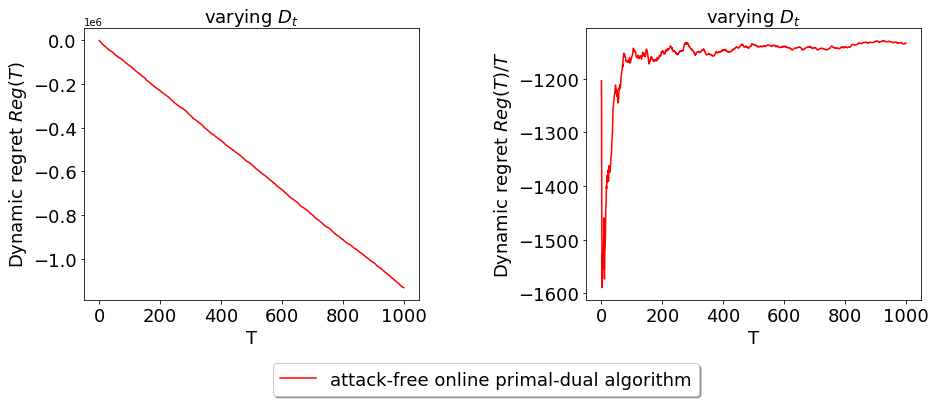

In [14]:
sub1=plt.subplot(1, 2, 1)##############################################################
iteration=[]
for i in range(0,999):
    iteration.append(i)

#在同一幅图片上画3条折线
A,=plt.plot(iteration,dynamic_regret,color = 'red',linewidth = '1.5',label='attack-free online primal-dual algorithm')


#设置图例并且设置图例的字体及大小
font1 = {
'size'   : 18,
}
#legend = plt.legend(handles=[A],prop=font1)
 
#设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=18)
 
#设置横纵坐标的名称以及对应字体格式
font2 = {
'size'   : 18,
}
plt.xlabel('T',font2)
plt.ylabel(r'Dynamic regret $Reg(T)$',font2)
plt.title('varying $D_{t}$',font2) 

sub2=plt.subplot(1, 2, 2)##############################################################
iteration=[]
for i in range(0,999):
    iteration.append(i)

#在同一幅图片上画3条折线
A,=plt.plot(iteration,dynamic_regret_T,color = 'red',linewidth = '1.5',label='attack-free online primal-dual algorithm')


#设置图例并且设置图例的字体及大小
font1 = {
'size'   : 18,
}
#legend = plt.legend(handles=[A],prop=font1)
 
#设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=18)
 
#设置横纵坐标的名称以及对应字体格式
font2 = {
'size'   : 18,
}
plt.xlabel('T',font2)
plt.ylabel(r'Dynamic regret $Reg(T)/T$',font2)
plt.title('varying $D_{t}$',font2) 

plt.legend(handles=[A],prop={'size':18},loc="upper center", bbox_to_anchor=[-0.3, -0.2],
           ncol=18, shadow=True, fancybox=True)

plt.subplots_adjust(wspace=0.5,hspace=0.5) 
plt.gcf().set_size_inches((15, 5))

#plt.savefig('./figures/01-figure1_dynamic_regret_attack_free_varying_D.pdf',format='pdf', bbox_inches='tight')
#plt.savefig('./figures/01-figure1_dynamic_regret_attack_free_varying_D.png',format='png', bbox_inches='tight')

In [15]:
#累计的约束违反

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sympy import *
import math 
from datetime import datetime
from scipy.special import gamma, factorial
import scipy.special as sc

In [17]:
sum_thermal_wind_power_station_strategy=np.loadtxt("./data/01_large_Gaussian_Byzantine_attack_sum_thermal_wind_power_station_strategy.txt")
d_power_demand=np.loadtxt("./data/d_power_demand_normal_distribution_(70,5).txt")

In [18]:
accumulative_constraint_violation=[]
accumulative_constraint_violation_T=[]
for T in range(1, 1000):
    accumulative_constraint_violation_auxiliary_variable=0
    for t in range(0, T): 
        accumulative_constraint_violation_auxiliary_variable=accumulative_constraint_violation_auxiliary_variable+(1/5)*sum_thermal_wind_power_station_strategy[t+1]-d_power_demand[t+1]
    accumulative_constraint_violation.append(abs(accumulative_constraint_violation_auxiliary_variable))
    accumulative_constraint_violation_T.append(abs(accumulative_constraint_violation_auxiliary_variable)/T)

In [19]:
accumulative_constraint_violation_T

[44.659041904000006,
 48.588688235000006,
 50.17775009133334,
 50.68399701250001,
 50.387618606800004,
 49.76501190933334,
 49.168623262857146,
 47.389963230750006,
 46.30648828044445,
 46.7427558344,
 46.41885999490909,
 44.87119245333334,
 43.916446488000005,
 43.178945814142864,
 41.89946581866668,
 41.03118058025,
 40.589640106941175,
 40.16431919922222,
 39.22656209484211,
 38.8268930021,
 38.465051733523815,
 38.07560945481819,
 37.80390660965218,
 37.73721877333334,
 37.16284868144001,
 37.143496908769244,
 37.16255650970371,
 36.8072332325,
 36.60071614689656,
 36.1526113186,
 35.68292902780646,
 35.68733419675,
 35.41249548751515,
 35.16740524917647,
 34.72391576411428,
 34.41914990205555,
 34.18628420372973,
 33.50292157057894,
 33.153785460512815,
 32.98686166429999,
 32.789831236634136,
 32.86492282861904,
 32.78819157027906,
 32.66430760418181,
 32.57158251448888,
 32.44620056460869,
 32.43040614306382,
 32.39296285770832,
 32.49070387685713,
 32.54518207595999,
 32.563287

In [20]:
#绘图 accumulative_constraint_violation和accumulative_constraint_violation_T

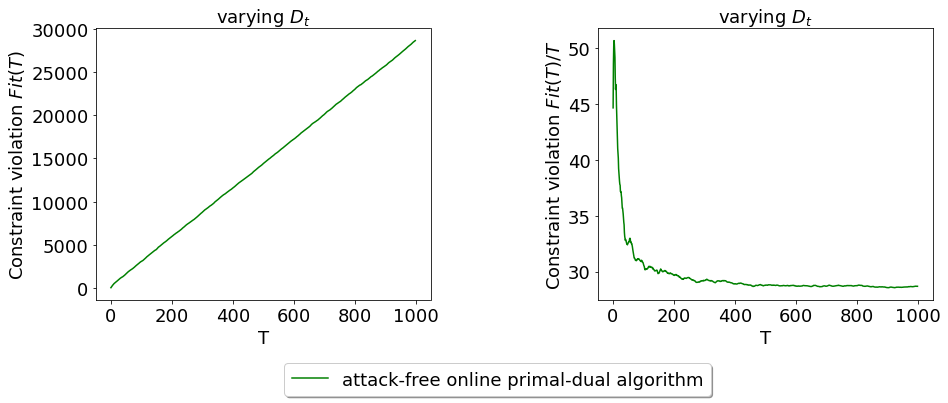

In [21]:
sub1=plt.subplot(1, 2, 1)##############################################################
iteration=[]
for i in range(0,999):
    iteration.append(i)

#在同一幅图片上画3条折线
A,=plt.plot(iteration,accumulative_constraint_violation,color = 'green',linewidth = '1.5',label='attack-free online primal-dual algorithm')


#设置图例并且设置图例的字体及大小
font1 = {
'size'   : 18,
}
#legend = plt.legend(handles=[A],prop=font1)
 
#设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=18)
 
#设置横纵坐标的名称以及对应字体格式
font2 = {
'size'   : 18,
}
plt.xlabel('T',font2)
plt.ylabel(r'Constraint violation $Fit(T)$',font2)
plt.title('varying $D_{t}$',font2) 

sub2=plt.subplot(1, 2, 2)##############################################################
iteration=[]
for i in range(0,999):
    iteration.append(i)

#在同一幅图片上画3条折线
A,=plt.plot(iteration,accumulative_constraint_violation_T,color = 'green',linewidth = '1.5',label='attack-free online primal-dual algorithm')


#设置图例并且设置图例的字体及大小
font1 = {
'size'   : 18,
}
#legend = plt.legend(handles=[A],prop=font1)
 
#设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=18)
 
#设置横纵坐标的名称以及对应字体格式
font2 = {
'size'   : 18,
}
plt.xlabel('T',font2)
plt.ylabel(r'Constraint violation $Fit(T)/T$',font2)
plt.title('varying $D_{t}$',font2) 

plt.legend(handles=[A],prop={'size':18},loc="upper center", bbox_to_anchor=[-0.3, -0.2],
           ncol=18, shadow=True, fancybox=True)

plt.subplots_adjust(wspace=0.5,hspace=0.5) 
plt.gcf().set_size_inches((15, 5))


#plt.savefig('./figures/01-figure2_constraint_violation_attack_free_varying_D.pdf',format='pdf', bbox_inches='tight')
#plt.savefig('./figures/01-figure2_constraint_violation_attack_free_varying_D.png',format='png', bbox_inches='tight')